In [54]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [55]:
df = pd.read_csv("anes_pilot_2019 (1).csv")

In [56]:
df

,version,caseid,weight,weight_spss,form,follow,reg1a,reg1b,liveurban,youthurban,...,ord_expretire,ord_expcolldebt,ord_expknowpris,ord_lc_reverse,ord_att2_reverse,starttime,endtime,duration,pop_density_public,flag_state
0,ANES 2019 Pilot Study version 20200204,1,1.34719693063187,1.10160293017768,1,2,2,-1,3,4,...,,,,0,1,12/31/2019 18:57:33,12/31/2019 19:39:49,2536,1520,0
1,ANES 2019 Pilot Study version 20200204,2,.780822076219216,.638478211724453,1,1,1,-1,3,3,...,,,,0,1,12/21/2019 4:19:56,12/21/2019 4:53:19,2003,1800,0
2,ANES 2019 Pilot Study version 20200204,3,.966366930694957,.790198239229266,1,1,1,-1,1,4,...,,,,0,0,12/22/2019 23:03:28,12/22/2019 23:41:43,2295,70,0
3,ANES 2019 Pilot Study version 20200204,4,1.10348514780374,.902319805359118,2,1,-1,1,4,4,...,2,3,1,0,0,12/31/2019 19:53:14,12/31/2019 20:23:11,1797,7600,0
4,ANES 2019 Pilot Study version 20200204,5,1.09069730256741,.891863184309371,2,1,-1,1,4,2,...,2,1,3,0,1,12/21/2019 4:07:09,12/21/2019 4:48:50,2501,4430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,ANES 2019 Pilot Study version 20200204,3161,,,2,1,-1,1,2,2,...,2,3,1,0,0,12/31/2019 19:38:13,12/31/2019 20:24:56,2803,,
3161,ANES 2019 Pilot Study version 20200204,3162,7.03646496881757,5.75371740500213,2,1,-1,2,4,3,...,2,3,1,0,1,12/31/2019 20:14:34,12/31/2019 20:53:50,2356,1800,0
3162,ANES 2019 Pilot Study version 20200204,3163,.892833236147303,.73006973719765,2,3,-1,3,4,1,...,3,1,2,0,1,12/31/2019 20:10:04,12/31/2019 20:29:15,1151,200,0
3163,ANES 2019 Pilot Study version 20200204,3164,1.58161278448241,1.29328477387127,2,1,-1,3,3,4,...,2,1,3,0,0,12/31/2019 22:10:05,12/31/2019 22:52:37,2552,6600,0


In [57]:
df1 = df[['pid7', 'fttrump', 'ftobama', 'ftbiden', 'ftwarren', 'ftsanders', 'ftbuttigieg', 'ftharris', 'ftblack', 'ftwhite', 'fthisp', 'ftasian', 'ftmuslim',   
 'ftillegal', 'ftimmig1', 'ftimmig2', 'ftjournal', 'ftnato', 'ftun',       
          'ftice', 'ftnra', 'ftchina', 'ftnkorea', 'ftmexico', 'ftsaudi',    
          'ftukraine', 'ftiran', 'ftbritain', 'ftgermany', 'ftjapan', 'ftisrael',   
          'ftfrance', 'ftcanada', 'ftturkey', 'ftrussia', 'ftpales']]
df1

,pid7,fttrump,ftobama,ftbiden,ftwarren,ftsanders,ftbuttigieg,ftharris,ftblack,ftwhite,...,ftiran,ftbritain,ftgermany,ftjapan,ftisrael,ftfrance,ftcanada,ftturkey,ftrussia,ftpales
0,2,47,90,52,52,49,997,50,99,99,...,77,98,94,89,88,99,99,92,89,86
1,6,41,30,41,17,31,30,29,91,96,...,22,89,91,94,71,66,100,20,25,77
2,1,0,91,88,15,60,70,68,48,49,...,1,50,1,1,1,51,87,50,1,3
3,1,100,50,0,0,0,0,0,0,0,...,15,85,10,85,50,75,50,75,25,0
4,5,94,18,25,1,10,16,7,93,94,...,5,73,44,72,97,58,96,60,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,5,81,20,7,4,6,1,2,94,94,...,4,70,19,90,60,61,60,10,25,10
3161,3,35,41,25,61,92,3,1,45,56,...,2,60,60,56,50,66,80,50,31,50
3162,4,6,31,50,2,59,0,31,88,100,...,59,100,72,99,99,99,100,51,41,87
3163,2,1,100,95,62,79,59,51,100,65,...,0,73,55,50,1,56,89,0,0,1


In [58]:
import numpy as np

df1['democrat'] = df1['pid7'].apply(lambda x: 1 if x in [1, 2, 3]  else 0 if x in [4, 5, 6, 7] else np.nan)
df1['Trump'] = df1['fttrump'].apply(lambda x: np.nan if (x < 0 or x > 100) else x)
df1['Obama'] = df1['ftobama'].apply(lambda x: np.nan if (x < 0 or x > 100) else x)
df1['Biden'] = df1['ftbiden'].apply(lambda x: np.nan if (x < 0 or x > 100) else x)
df1['Warren'] = df1['ftwarren'].apply(lambda x: np.nan if (x < 0 or x > 100) else x)
df1['Sanders'] = df1['ftsanders'].apply(lambda x: np.nan if (x < 0 or x > 100) else x)
df1['Buttigieg'] = df1['ftbuttigieg'].apply(lambda x: np.nan if (x < 0 or x > 100) else x)
df1['Harris'] = df1['ftharris'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Black'] = df1['ftblack'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['White'] = df1['ftwhite'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Hispanic'] = df1['fthisp'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Asian'] = df1['ftasian'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Muslim'] = df1['ftmuslim'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Illegal'] = df1['ftillegal'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Immigrants']  = df1['ftimmig1'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Legal Immigrants'] = df1['ftimmig2'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Journalists'] = df1['ftjournal'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['NATO'] = df1['ftnato'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['UN'] = df1['ftun'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['ICE'] = df1['ftice'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['NRA'] = df1['ftnra'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['China']  = df1['ftchina'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['North Korea'] = df1['ftnkorea'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Mexico'] = df1['ftmexico'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Saudi Arabia'] = df1['ftsaudi'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Ukraine'] = df1['ftukraine'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Iran'] = df1['ftiran'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Britain'] = df1['ftbritain'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Germany'] = df1['ftgermany'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Japan']  = df1['ftjapan'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Israel'] = df1['ftisrael'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['France'] = df1['ftfrance'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Canada'] = df1['ftcanada'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Turkey'] = df1['ftturkey'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Russia'] = df1['ftrussia'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Palestine'] = df1['ftpales'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df1['Buttigieg'] = df1['ftbuttigieg'].apply(lambda x: np.nan if x < 0 or x > 100 else x)

In [59]:
to_drop = ['pid7', 'fttrump', 'ftobama', 'ftbiden', 'ftwarren', 'ftsanders', 'ftbuttigieg', 'ftharris', 'ftblack', 'ftwhite', 'fthisp', 'ftasian', 'ftmuslim',   
        'ftillegal', 'ftimmig1', 'ftimmig2', 'ftjournal', 'ftnato', 'ftun', 'ftice', 'ftnra', 'ftchina', 'ftnkorea', 'ftmexico', 'ftsaudi',  'ftukraine', 'ftiran', 'ftbritain', 'ftgermany', 'ftjapan', 'ftisrael',   
        'ftfrance', 'ftcanada', 'ftturkey', 'ftrussia', 'ftpales']

df1 = df1.drop(columns=to_drop)

In [60]:
df1

,democrat,Trump,Obama,Biden,Warren,Sanders,Buttigieg,Harris,Black,White,...,Iran,Britain,Germany,Japan,Israel,France,Canada,Turkey,Russia,Palestine
0,1.0,47.0,90.0,52.0,52.0,49.0,NaN,50.0,99.0,99.0,...,77.0,98,94,89,88.0,99.0,99,92.0,89.0,86.0
1,0.0,41.0,30.0,41.0,17.0,31.0,30.0,29.0,91.0,96.0,...,22.0,89,91,94,71.0,66.0,100,20.0,25.0,77.0
2,1.0,0.0,91.0,88.0,15.0,60.0,70.0,68.0,48.0,49.0,...,1.0,50,1,1,1.0,51.0,87,50.0,1.0,3.0
3,1.0,100.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,85,10,85,50.0,75.0,50,75.0,25.0,0.0
4,0.0,94.0,18.0,25.0,1.0,10.0,16.0,7.0,93.0,94.0,...,5.0,73,44,72,97.0,58.0,96,60.0,45.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,0.0,81.0,20.0,7.0,4.0,6.0,1.0,2.0,94.0,94.0,...,4.0,70,19,90,60.0,61.0,60,10.0,25.0,10.0
3161,1.0,35.0,41.0,25.0,61.0,92.0,3.0,1.0,45.0,56.0,...,2.0,60,60,56,50.0,66.0,80,50.0,31.0,50.0
3162,0.0,6.0,31.0,50.0,2.0,59.0,0.0,31.0,88.0,100.0,...,59.0,100,72,99,99.0,99.0,100,51.0,41.0,87.0
3163,1.0,1.0,100.0,95.0,62.0,79.0,59.0,51.0,100.0,65.0,...,0.0,73,55,50,1.0,56.0,89,0.0,0.0,1.0


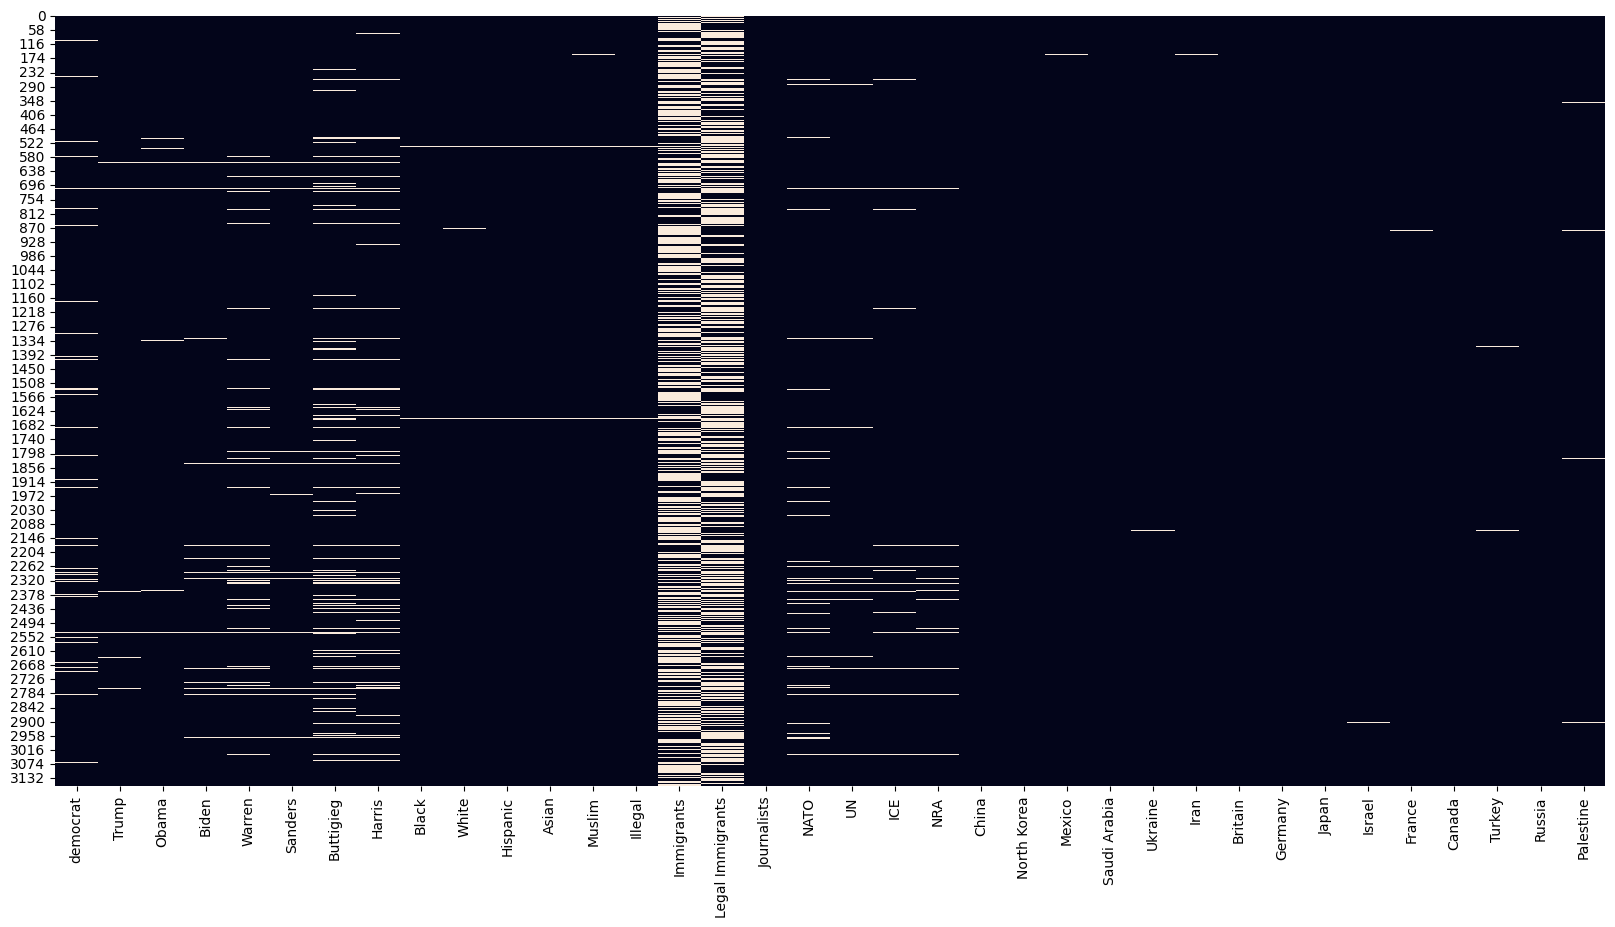

In [74]:
import seaborn as sns
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

https://stackoverflow.com/questions/69539114/how-to-visualize-missing-values-patterns-in-pandas

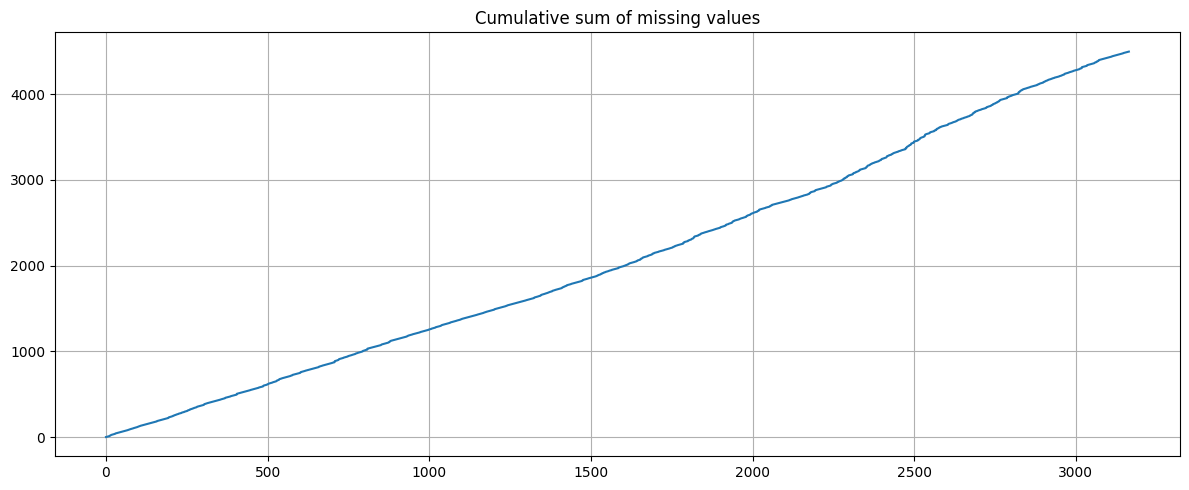

In [72]:
row = df1.isnull().sum(axis=1)
cumsum = row.cumsum()
plt.figure(figsize=(12, 5))
plt.plot(cumsum)
plt.title("Cumulative sum of missing values")
plt.grid(True)
plt.tight_layout()
plt.show()

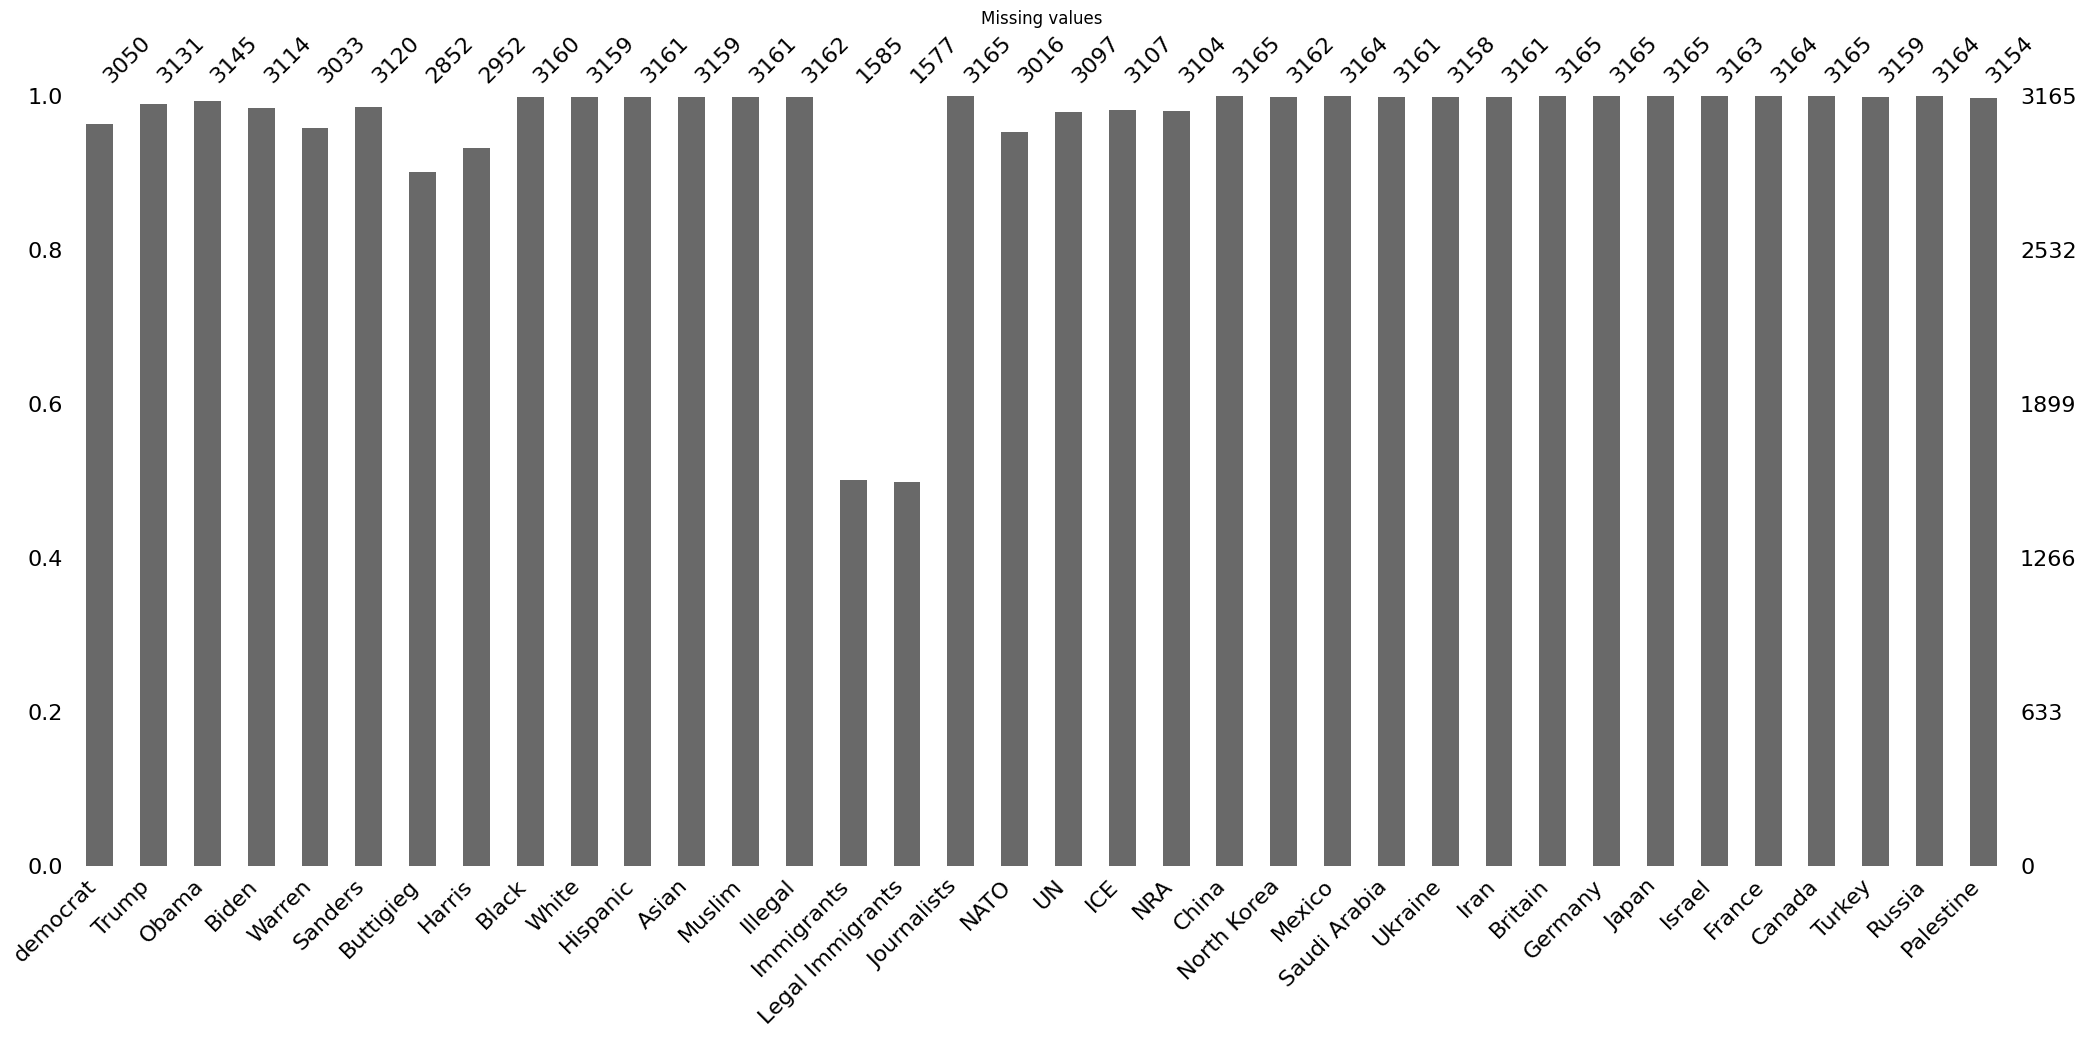

In [75]:
import missingno as msno
msno.bar(df1plt.title("Missing values")
plt.show()

<Axes: >

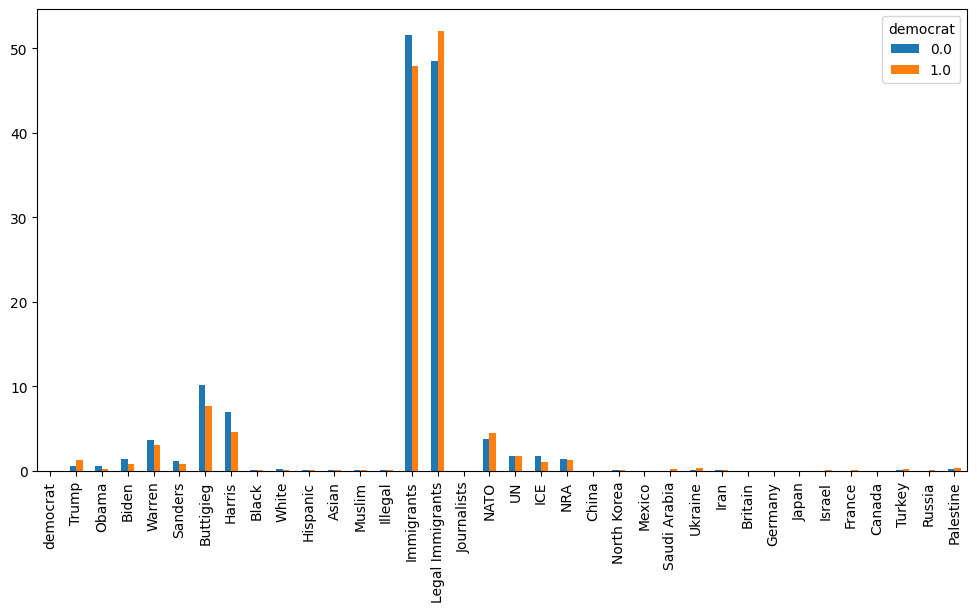

In [82]:
grouped_missing = (df1.groupby('democrat').apply(lambda g: g.isnull().mean() * 100).transpose())

grouped_missing.plot(kind='bar', figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

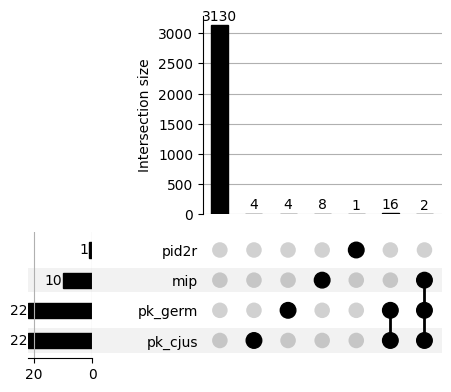

In [89]:
from upsetplot import from_indicators, UpSet
nulls = df.isnull()
upset = from_indicators(nulls.columns.tolist(), nulls)
plt.figure(figsize=(12, 6));
upset = UpSet(upset, subset_size='count', show_counts=True);
upset.plot();

In [83]:
anes_deleted = df1.dropna()

In [99]:
from sklearn.impute import KNNImputer
import time
X = df1.drop(columns=['democrat'])
y = df1['democrat']
imputer = KNNImputer(n_neighbors=2)
start = time.time()
X_imputed = imputer.fit_transform(X)
end = time.time()
print(end)
anes_imp = pd.DataFrame(X_imputed, columns=X.columns)
anes_imputed = pd.concat([y.reset_index(drop=True), anes_imp], axis=1)

1751658232.997749


In [100]:
anes_imputed

,democrat,Trump,Obama,Biden,Warren,Sanders,Buttigieg,Harris,Black,White,...,Iran,Britain,Germany,Japan,Israel,France,Canada,Turkey,Russia,Palestine
0,1.0,47.0,90.0,52.0,52.0,49.0,61.0,50.0,99.0,99.0,...,77.0,98.0,94.0,89.0,88.0,99.0,99.0,92.0,89.0,86.0
1,0.0,41.0,30.0,41.0,17.0,31.0,30.0,29.0,91.0,96.0,...,22.0,89.0,91.0,94.0,71.0,66.0,100.0,20.0,25.0,77.0
2,1.0,0.0,91.0,88.0,15.0,60.0,70.0,68.0,48.0,49.0,...,1.0,50.0,1.0,1.0,1.0,51.0,87.0,50.0,1.0,3.0
3,1.0,100.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,85.0,10.0,85.0,50.0,75.0,50.0,75.0,25.0,0.0
4,0.0,94.0,18.0,25.0,1.0,10.0,16.0,7.0,93.0,94.0,...,5.0,73.0,44.0,72.0,97.0,58.0,96.0,60.0,45.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,0.0,81.0,20.0,7.0,4.0,6.0,1.0,2.0,94.0,94.0,...,4.0,70.0,19.0,90.0,60.0,61.0,60.0,10.0,25.0,10.0
3161,1.0,35.0,41.0,25.0,61.0,92.0,3.0,1.0,45.0,56.0,...,2.0,60.0,60.0,56.0,50.0,66.0,80.0,50.0,31.0,50.0
3162,0.0,6.0,31.0,50.0,2.0,59.0,0.0,31.0,88.0,100.0,...,59.0,100.0,72.0,99.0,99.0,99.0,100.0,51.0,41.0,87.0
3163,1.0,1.0,100.0,95.0,62.0,79.0,59.0,51.0,100.0,65.0,...,0.0,73.0,55.0,50.0,1.0,56.0,89.0,0.0,0.0,1.0


In [101]:
df1.describe()

,democrat,Trump,Obama,Biden,Warren,Sanders,Buttigieg,Harris,Black,White,...,Iran,Britain,Germany,Japan,Israel,France,Canada,Turkey,Russia,Palestine
count,3050.000000,3131.000000,3145.000000,3114.000000,3033.000000,3120.000000,2852.000000,2952.000000,3160.000000,3159.000000,...,3161.000000,3165.000000,3165.000000,3165.000000,3163.000000,3164.000000,3165.000000,3159.000000,3164.000000,3154.000000
mean,0.434098,43.870010,53.531002,42.151895,40.514342,42.149679,38.660940,35.304878,70.861076,70.910415,...,26.558051,69.140284,60.447077,64.789889,59.641163,58.579330,72.419589,37.685977,31.427307,40.134115
std,0.495719,41.430554,37.538942,33.436666,34.355869,34.881989,30.396013,30.184408,23.782650,22.817152,...,24.788865,23.691241,24.822482,23.868048,29.098927,25.069534,23.950280,23.809837,24.979804,27.441697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,11.000000,7.000000,4.000000,5.000000,7.000000,4.000000,51.000000,51.000000,...,4.000000,52.000000,49.000000,50.000000,43.000000,47.000000,56.000000,18.000000,8.000000,13.000000
50%,0.000000,38.000000,59.000000,42.000000,41.000000,42.000000,41.000000,35.000000,73.000000,73.000000,...,20.000000,72.000000,60.000000,67.000000,58.000000,59.000000,78.000000,41.000000,30.000000,47.000000
75%,1.000000,91.000000,91.000000,70.000000,71.000000,73.000000,61.000000,58.000000,91.000000,90.000000,...,47.000000,89.000000,80.000000,84.000000,86.000000,78.000000,92.000000,51.000000,50.000000,55.000000
max,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [102]:
anes_imputed.describe()

,democrat,Trump,Obama,Biden,Warren,Sanders,Buttigieg,Harris,Black,White,...,Iran,Britain,Germany,Japan,Israel,France,Canada,Turkey,Russia,Palestine
count,3050.000000,3165.000000,3165.000000,3165.000000,3165.00000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,...,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000
mean,0.434098,43.695103,53.512796,42.255292,40.74060,42.273144,38.959874,35.507425,70.854818,70.906951,...,26.549605,69.140284,60.447077,64.789889,59.637915,58.583254,72.419589,37.691469,31.420379,40.131912
std,0.495719,41.346946,37.498341,33.271145,33.96084,34.766310,29.729984,29.707195,23.767069,22.800122,...,24.781945,23.691241,24.822482,23.868048,29.091452,25.066544,23.950280,23.789060,24.978897,27.418922
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,11.000000,8.000000,5.00000,5.000000,9.000000,5.000000,51.000000,51.000000,...,4.000000,52.000000,49.000000,50.000000,43.000000,47.000000,56.000000,18.000000,8.000000,13.000000
50%,0.000000,37.000000,59.000000,43.000000,41.00000,43.000000,41.000000,36.000000,73.000000,73.000000,...,20.000000,72.000000,60.000000,67.000000,58.000000,59.000000,78.000000,41.000000,30.000000,47.000000
75%,1.000000,90.000000,91.000000,70.000000,70.00000,73.000000,60.000000,57.000000,91.000000,90.000000,...,47.000000,89.000000,80.000000,84.000000,86.000000,78.000000,92.000000,51.000000,50.000000,55.000000
max,1.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
